In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score


data = pd.read_csv('/content/Online_Retail.csv', encoding='ISO-8859-1')


# Display basic information about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Drop rows with missing Customer IDs
data = data.dropna(subset=['CustomerID'])

# Remove outliers by filtering out very low and very high values
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Create a feature for total spending
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

# Aggregate data at the customer level
customer_data = data.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'InvoiceNo': 'count'  # Number of transactions
}).reset_index()

# Rename columns for clarity
customer_data.columns = ['CustomerID', 'TotalSpend', 'TransactionCount']

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpend', 'TransactionCount']])

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_data, columns=['TotalSpend', 'TransactionCount'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

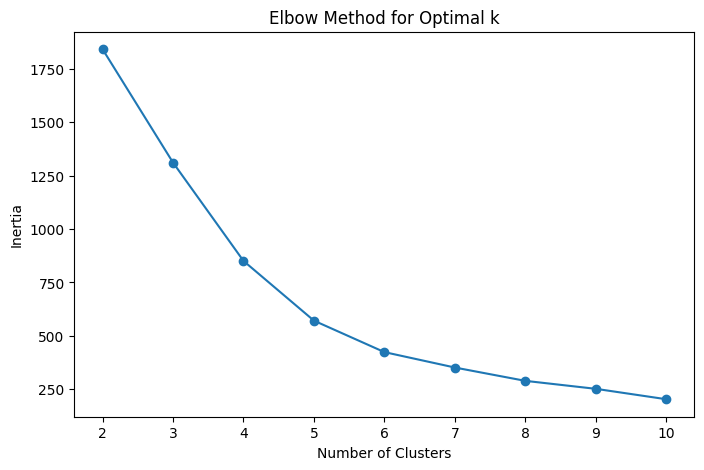

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Define the range of clusters to try
k_range = range(2, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-means with the optimal number of clusters (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to the customer data
customer_data['Cluster'] = clusters


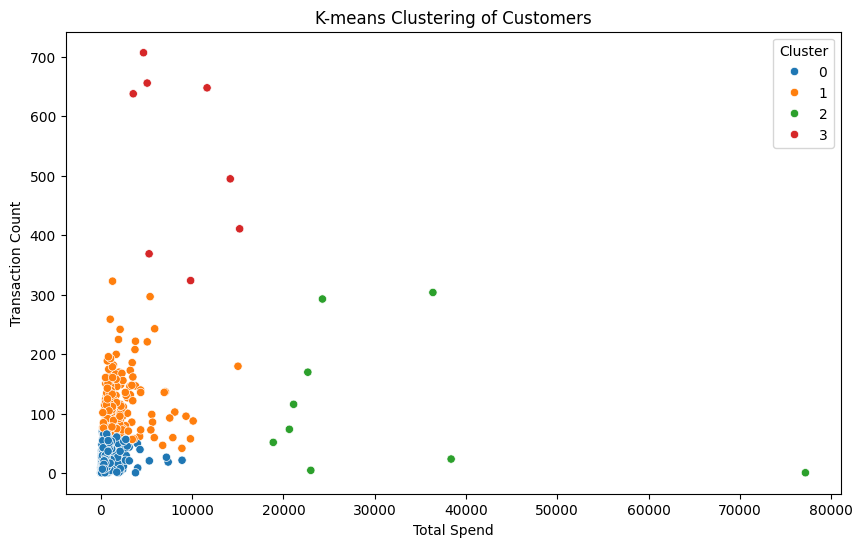

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSpend', y='TransactionCount', hue='Cluster', data=customer_data, palette='tab10')
plt.title('K-means Clustering of Customers')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.show()


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('Online_Retail.csv')

# Drop rows with missing Customer IDs and filter valid values
data = data.dropna(subset=['CustomerID'])
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Create a feature for total spending and aggregate data at the customer level
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']
customer_data = data.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'InvoiceNo': 'count'  # Number of transactions
}).reset_index()
customer_data.columns = ['CustomerID', 'TotalSpend', 'TransactionCount']

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpend', 'TransactionCount']])
scaled_df = pd.DataFrame(scaled_data, columns=['TotalSpend', 'TransactionCount'])

# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-means with the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSpend', y='TransactionCount', hue='Cluster', data=customer_data, palette='tab10')
plt.title('K-means Clustering of Customers')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 105202: invalid start byte